# csv data 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import_potato = pd.read_csv('import_potato.csv',encoding='utf-8')
import_sweet = pd.read_csv('import_sweet.csv',encoding='utf-8')
inflation = pd.read_csv('inflation.csv',encoding='utf-8')
oil = pd.read_csv('oil.csv',encoding='utf-8')
sweet_area_prod = pd.read_csv('sweet_area_prod.csv',encoding='utf-8')
trend = pd.read_csv('trend.csv',encoding='utf-8')
weather = pd.read_csv('weather.csv',encoding='ansi')
damage = pd.read_csv('damage.csv',encoding='utf-8')
potato_area_prod = pd.read_csv('potato_area_prod.csv',encoding='utf-8')
price = pd.read_csv('price.csv',encoding='utf-8')

# raw data 전처리

- 한글명 columns → 영문 columns
- date 표시형식 통일 → yyyy-mm-dd
- null값 처리
- ['-',''] → 0으로 처리
    - 아예 데이터가 없는 셀은 dataframe 합칠 때 0으로 채우기

## import_potato

In [2]:
import_potato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    216 non-null    float64
 1   import  216 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [3]:
import_potato.columns = ['date','import_potato']

In [4]:
import_potato['import_potato'] = import_potato['import_potato'].replace(',','',regex=True)
import_potato['import_potato'] = import_potato['import_potato'].apply(lambda x : float(x))

In [5]:
import_potato['date'] = import_potato['date'].astype(str)
import_potato['date']=import_potato['date'].str.replace('.','',regex=True)
import_potato.head()

,date,import_potato
0,200001,62115.0
1,200002,46733.0
2,200003,62221.0
3,200004,109549.0
4,200005,73318.0


In [6]:
date_list = list(import_potato['date'])

In [7]:
pot_mod = []

for i in date_list:
    i = str(i)
    if len(i) != 6:
        new = i[0:5] +'0'
        pot_mod.append(int(new))
    else:
        pot_mod.append(int(i))

In [8]:
import_potato['date'] = pot_mod

In [9]:
from datetime import datetime
import_potato['date'] = import_potato['date'].astype(str)
import_potato['date'] = import_potato['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
import_potato['date'] = import_potato['date'].astype('datetime64')

In [10]:
import_potato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           216 non-null    datetime64[ns]
 1   import_potato  216 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [11]:
import_potato.head()

,date,import_potato
0,2000-01-01,62115.0
1,2000-02-01,46733.0
2,2000-03-01,62221.0
3,2000-04-01,109549.0
4,2000-05-01,73318.0


## import_sweet

In [12]:
import_sweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      160 non-null    float64
 1   수입중량    160 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [13]:
import_sweet.columns = ['date','import_sweet']

In [14]:
import_sweet['import_sweet'] = import_sweet['import_sweet'].replace(',','',regex=True)
import_sweet['import_sweet'] = import_sweet['import_sweet'].apply(lambda x : float(x))
import_sweet['import_sweet']=import_sweet['import_sweet'].replace('-','0')

In [15]:
import_sweet['date'] = import_sweet['date'].astype(str)
import_sweet['date']=import_sweet['date'].str.replace('.','',regex=True)
date_list = list(import_sweet['date'])

sweet_mod = []

for i in date_list:
    i = str(i)
    if len(i) != 6:
        new = i[0:5] +'0'
        sweet_mod.append(int(new))
    else:
        sweet_mod.append(int(i)) 

import_sweet['date'] = sweet_mod

In [16]:
from datetime import datetime
import_sweet['date'] = import_sweet['date'].astype(str)
import_sweet['date'] = import_sweet['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
import_sweet['date'] = import_sweet['date'].astype('datetime64')

In [17]:
import_sweet.head()

,date,import_sweet
0,2000-02-01,12500.0
1,2000-06-01,12500.0
2,2000-09-01,12500.0
3,2000-11-01,23500.0
4,2001-03-01,23500.0


## inflation

In [18]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 216 non-null    int64  
 1   소비자물가 총지수(2015=100)  216 non-null    float64
 2   소비자물가상승률(%)          216 non-null    float64
 3   식료품 · 비주류음료          216 non-null    float64
 4   주류 및 담배              216 non-null    float64
 5   의류 및 신발              216 non-null    float64
 6   주택 ·수도 · 전기 및 연료     216 non-null    float64
 7   가정용품 및 가사 서비스        216 non-null    float64
 8   보건                   216 non-null    float64
 9   교통                   216 non-null    float64
 10  통신                   216 non-null    float64
 11  오락 및 문화              216 non-null    float64
 12  교육                   216 non-null    float64
 13  음식 및 숙박              216 non-null    float64
 14  기타 상품 및 서비스          216 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 2

In [19]:
inflation.columns = ['date',"CP", "CIR", "food_non_bever",'liq_ciga','cloth_shoe','hous','hous_goods_ser','sani',
                    'traff','comm','enter_cul','edu','food_acc','others']

CP(Consumer Price Gross Index) : 소비자물가 총지수(2015=100) \
CIR(Consumer inflation rate) : 소비자물가상승률(%) \
food_non_bever(Food and non-mainstream beverages) : 식료품 · 비주류음료\
liq_ciga(Liquor and cigarette) : 주류 및 담배\
cloth_shoe(Clothing and Shoes) : 의류 및 신발\
hous(Housing, water supply, electricity and fuel) : 주택 ·수도 · 전기 및 연료\
hous_goods_ser(Household Goods and Household Services) : 가정용품 및 가사 서비스\
sani(sanitation) : 보건\
traff(traffic) : 교통\
comm(communication) : 통신\
enter_cul(entertainment and culture) : 오락 및 문화\
edu(education) : 교육\
food_acc(Food and Accommodation) : 음식 및 숙박\
others(Other Goods and Services) : 기타 상품 및 서비스

In [20]:
from datetime import datetime
inflation['date'] = inflation['date'].astype(str)
inflation['date'] = inflation['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
inflation['date'] =inflation['date'].astype('datetime64')

In [21]:
inflation = inflation.drop(['CP', 'liq_ciga', 'cloth_shoe', 'hous', 'hous_goods_ser','sani',
                    'traff','comm','enter_cul','edu','food_acc','others'],axis = 1)

In [22]:
inflation.head()

,date,CIR,food_non_bever
0,2000-01-01,2.3,0.8
1,2000-02-01,2.3,0.8
2,2000-03-01,2.3,0.8
3,2000-04-01,2.3,0.8
4,2000-05-01,2.3,0.8


## oil

In [23]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       216 non-null    int64  
 1   oil_price  216 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [24]:
from datetime import datetime
oil['date'] = oil['date'].astype(str)
oil['date'] = oil['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
oil['date'] =oil['date'].astype('datetime64')

In [25]:
oil.head()

,date,oil_price
0,2000-01-01,592.28
1,2000-02-01,590.67
2,2000-03-01,590.19
3,2000-04-01,578.95
4,2000-05-01,559.25


## potato_area_prod

In [26]:
potato_area_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   date        216 non-null    int64
 1   area        216 non-null    int64
 2   production  216 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


In [27]:
potato_area_prod['area']=potato_area_prod['area'].astype(float).apply(lambda x: x/12)
potato_area_prod['production']=potato_area_prod['production'].astype(float).apply(lambda x: x/12)

In [28]:
from datetime import datetime
potato_area_prod['date'] = potato_area_prod['date'].astype(str)
potato_area_prod['date'] = potato_area_prod['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
potato_area_prod['date'] =potato_area_prod['date'].astype('datetime64')

In [29]:
potato_area_prod.head()

,date,area,production
0,2000-01-01,699.416667,23098.833333
1,2000-02-01,699.416667,23098.833333
2,2000-03-01,699.416667,23098.833333
3,2000-04-01,699.416667,23098.833333
4,2000-05-01,699.416667,23098.833333


## sweet_area_prod

In [30]:
sweet_area_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   date              216 non-null    int64
 1   area_sweet        216 non-null    int64
 2   production_sweet  216 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


In [31]:
sweet_area_prod['area_sweet']=sweet_area_prod['area_sweet'].astype(float).apply(lambda x: x/12)
sweet_area_prod['production_sweet']=sweet_area_prod['production_sweet'].astype(float).apply(lambda x: x/12)

In [32]:
from datetime import datetime
sweet_area_prod['date'] = sweet_area_prod['date'].astype(str)
sweet_area_prod['date'] = sweet_area_prod['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
sweet_area_prod['date'] =sweet_area_prod['date'].astype('datetime64')

In [33]:
sweet_area_prod.head()

,date,area_sweet,production_sweet
0,2000-01-01,27.0,486.0
1,2000-02-01,27.0,486.0
2,2000-03-01,27.0,486.0
3,2000-04-01,27.0,486.0
4,2000-05-01,27.0,486.0


## trend

In [34]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    216 non-null    int64
 1   trend   216 non-null    int64
dtypes: int64(2)
memory usage: 3.5 KB


In [35]:
trend['trend']=trend['trend'].astype(float)

In [36]:
from datetime import datetime
trend['date'] = trend['date'].astype(str)
trend['date'] = trend['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
trend['date'] =trend['date'].astype('datetime64')

In [37]:
trend.head()

,date,trend
0,2000-01-01,1.0
1,2000-02-01,0.0
2,2000-03-01,2.0
3,2000-04-01,2.0
4,2000-05-01,7.0


## weather

In [38]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    216 non-null    int64  
 1   평균기온    216 non-null    float64
 2   평균최고기온  216 non-null    float64
 3   평균최저기온  216 non-null    float64
 4   강수량     216 non-null    float64
 5   평균상대습도  216 non-null    int64  
 6   최심신적설   216 non-null    object 
 7   평균풍속    216 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 13.6+ KB


In [39]:
weather.columns = ["date", "avg_temp", "avg_high_temp",'avg_low_temp','rain','avg_hum','snow','avg_wind']

In [40]:
weather['snow']=weather['snow'].replace('-','0')
weather['snow']=weather['snow'].replace('...','0')
weather['avg_hum']=weather['avg_hum'].astype(float)
weather['snow']=weather['snow'].astype(float)

In [41]:
from datetime import datetime
weather['date'] = weather['date'].astype(str)
weather['date'] = weather['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
weather['date'] =weather['date'].astype('datetime64')

In [42]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           216 non-null    datetime64[ns]
 1   avg_temp       216 non-null    float64       
 2   avg_high_temp  216 non-null    float64       
 3   avg_low_temp   216 non-null    float64       
 4   rain           216 non-null    float64       
 5   avg_hum        216 non-null    float64       
 6   snow           216 non-null    float64       
 7   avg_wind       216 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 13.6 KB


## damage

In [43]:
damage.head()

,date,damage_price,damage_crop
0,200001,NaN,NaN
1,200002,NaN,NaN
2,200003,NaN,NaN
3,200004,NaN,NaN
4,200005,NaN,NaN


In [44]:
from datetime import datetime
damage['date'] = damage['date'].astype(str)
damage['date'] = damage['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
damage['date'] =damage['date'].astype('datetime64')

In [45]:
damage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          216 non-null    datetime64[ns]
 1   damage_price  31 non-null     float64       
 2   damage_crop   22 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.2 KB


In [46]:
damage.isnull().sum()

date              0
damage_price    185
damage_crop     194
dtype: int64

In [47]:
damage.fillna(0,inplace=True)

In [48]:
damage.isnull().sum()

date            0
damage_price    0
damage_crop     0
dtype: int64

In [49]:
damage.head()

,date,damage_price,damage_crop
0,2000-01-01,0.0,0.0
1,2000-02-01,0.0,0.0
2,2000-03-01,0.0,0.0
3,2000-04-01,0.0,0.0
4,2000-05-01,0.0,0.0


## price

In [50]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    216 non-null    int64  
 1   price   216 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [51]:
from datetime import datetime
price['date'] = price['date'].astype(str)
price['date'] = price['date'].apply(lambda _: datetime.strptime(_,"%Y%m").strftime('%Y-%m'))
price['date'] =price['date'].astype('datetime64')

In [52]:
price.head()

,date,price
0,2000-01-01,15096.000000
1,2000-02-01,14860.869570
2,2000-03-01,13538.461540
3,2000-04-01,9460.869565
4,2000-05-01,9141.666667


# EDA(탐색적 데이터 분석)

## import_potato

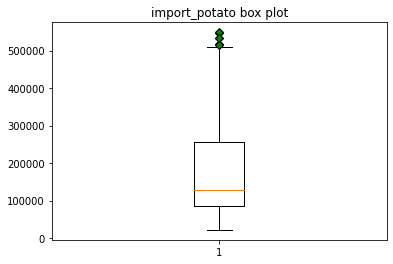

In [53]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(import_potato['import_potato'], flierprops=green_diamond)
plt.title("import_potato box plot")
plt.show()

In [54]:
import_potato.describe()

,import_potato
count,216.000000
mean,180714.449074
std,127537.690594
min,22000.000000
25%,85218.000000
50%,127900.500000
75%,255700.500000
max,548847.000000


In [55]:
import_potato.sort_values(by=['import_potato'],ascending=False).head()

,date,import_potato
194,2016-03-01,548847.0
184,2015-05-01,548009.0
183,2015-04-01,534490.0
215,2017-12-01,533452.0
182,2015-03-01,517882.0


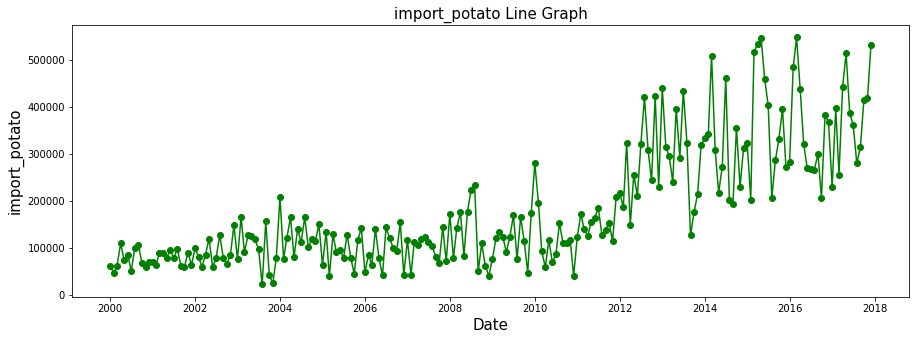

In [56]:
plt.figure(figsize=(15,5))
plt.plot(import_potato.date, import_potato.import_potato, marker='o', color='g')
plt.title('import_potato Line Graph', fontsize=15) 
plt.ylabel('import_potato', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

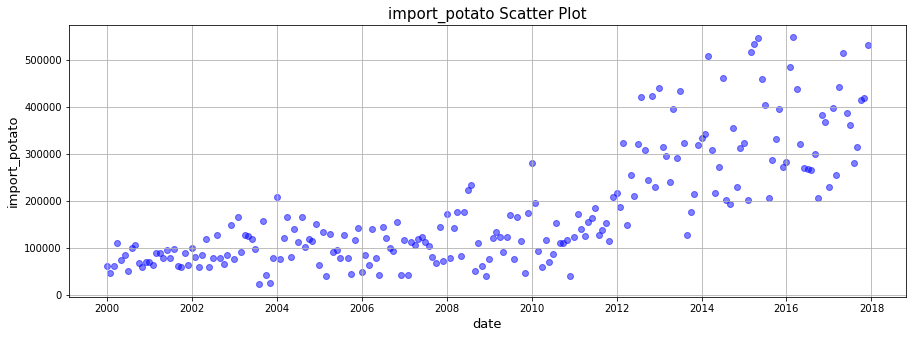

In [57]:
plt.figure(figsize=(15,5))
plt.title("import_potato Scatter Plot", fontsize=15)
plt.scatter(import_potato["date"], import_potato["import_potato"], color='blue', alpha=.5)
plt.xlabel("date", fontsize=13)
plt.ylabel("import_potato", fontsize=13)
plt.grid()
plt.show()

- 2015~2018 감자 수입량 왜 늘었을까?

## import_sweet

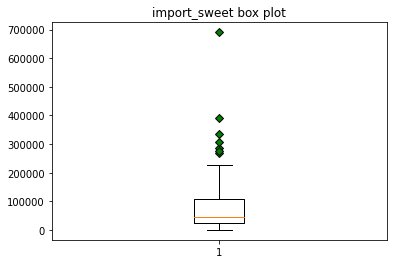

In [58]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(import_sweet['import_sweet'], flierprops=green_diamond)
plt.title("import_sweet box plot")
plt.show()

In [59]:
import_sweet.sort_values(by=['import_sweet'],ascending=False).head()

,date,import_sweet
34,2005-01-01,690830.0
33,2004-12-01,391000.0
35,2005-02-01,336000.0
32,2004-11-01,308000.0
31,2004-10-01,286200.0


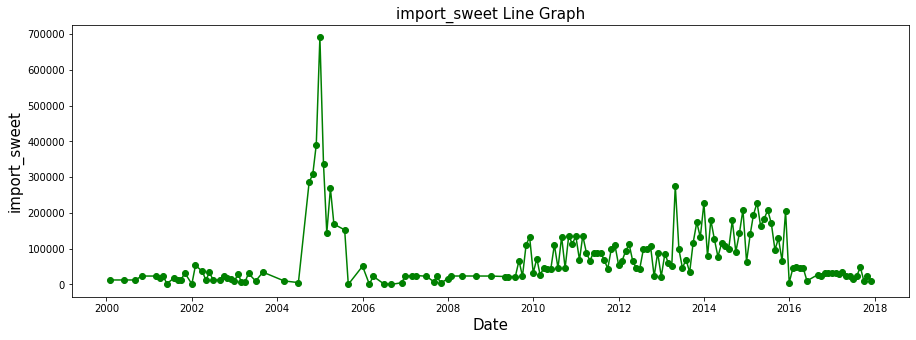

In [60]:
plt.figure(figsize=(15,5))
plt.plot(import_sweet.date, import_sweet.import_sweet, marker='o', color='g')
plt.title('import_sweet Line Graph', fontsize=15) 
plt.ylabel('import_sweet', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

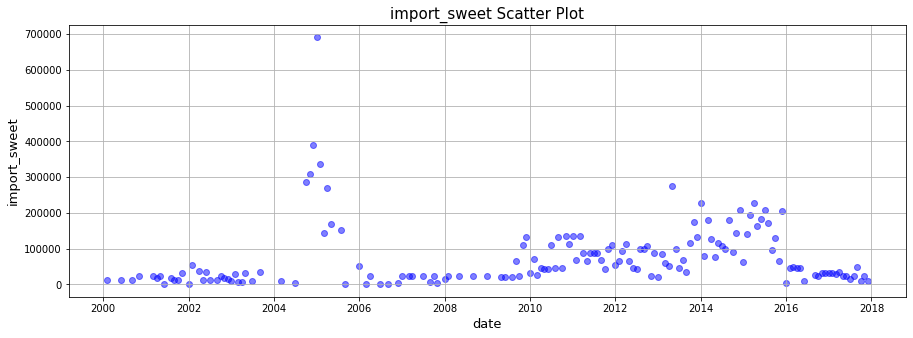

In [61]:
plt.figure(figsize=(15,5))
plt.title("import_sweet Scatter Plot", fontsize=15)
plt.scatter(import_sweet["date"], import_sweet["import_sweet"], color='blue', alpha=.5)
plt.xlabel("date", fontsize=13)
plt.ylabel("import_sweet", fontsize=13)
plt.grid()
plt.show()

- 2005년 고구마 수입량 왜 늘었을까?

- 감자와 고구마 수입량 관계

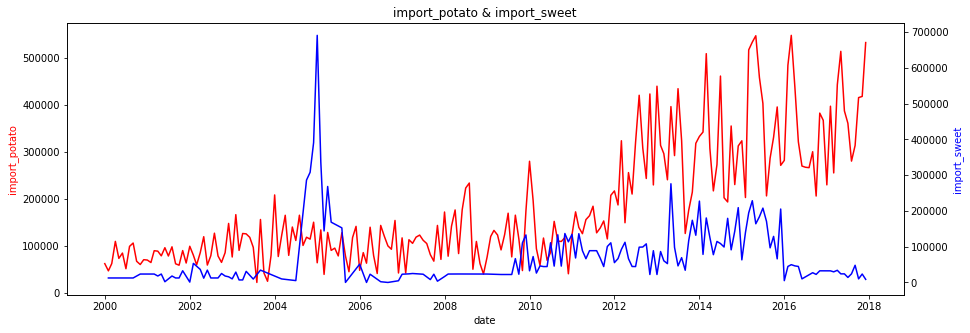

In [62]:
fig,ax=plt.subplots(figsize = (15,5))
plt.title('import_potato & import_sweet')
ax.plot(import_potato['date'], import_potato['import_potato'], color = 'red')
ax.set_xlabel('date')
ax.set_ylabel('import_potato', color = 'red')
ax2= ax.twinx()
ax2.plot(import_sweet['date'], import_sweet['import_sweet'], color = 'blue')
ax2.set_ylabel('import_sweet', color = 'blue')
plt.show()

## inflation

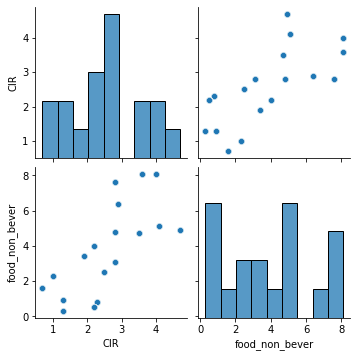

In [63]:
sns.pairplot(data = inflation)

In [64]:
inf_price = pd.merge(inflation,price, how='left',on='date')
inf_price

,date,CIR,food_non_bever,price
0,2000-01-01,2.3,0.8,15096.000000
1,2000-02-01,2.3,0.8,14860.869570
2,2000-03-01,2.3,0.8,13538.461540
3,2000-04-01,2.3,0.8,9460.869565
4,2000-05-01,2.3,0.8,9141.666667
...,...,...,...,...
211,2017-08-01,1.9,3.4,39854.545450
212,2017-09-01,1.9,3.4,41276.190480
213,2017-10-01,1.9,3.4,42775.000000
214,2017-11-01,1.9,3.4,42236.363640


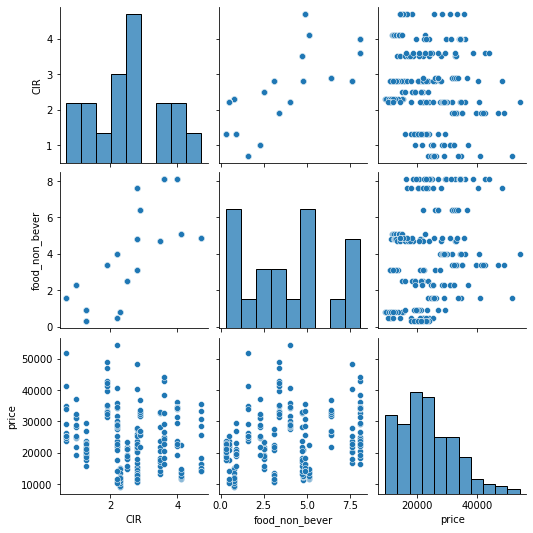

In [65]:
sns.pairplot(data = inf_price)

In [66]:
inflation.describe()

,CIR,food_non_bever
count,216.000000,216.000000
mean,2.588889,3.838889
std,1.085150,2.510067
min,0.700000,0.300000
25%,1.900000,1.600000
50%,2.650000,3.700000
75%,3.500000,5.100000
max,4.700000,8.100000


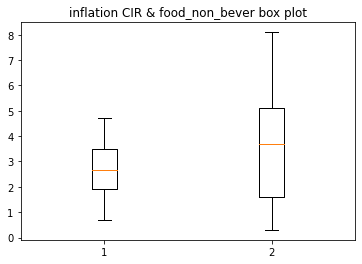

In [67]:
data1 = [inflation['CIR'],inflation['food_non_bever']]
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(data1, flierprops=green_diamond)
plt.title("inflation CIR & food_non_bever box plot")
plt.show()

## oil

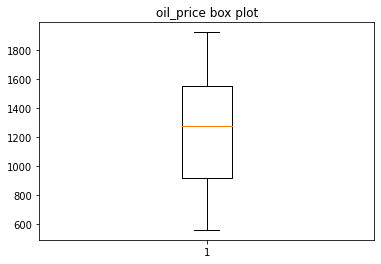

In [68]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(oil['oil_price'], flierprops=green_diamond)
plt.title("oil_price box plot")
plt.show()

## potato_area_prod

Text(0.5, 1.0, 'potato_production Line Graph')

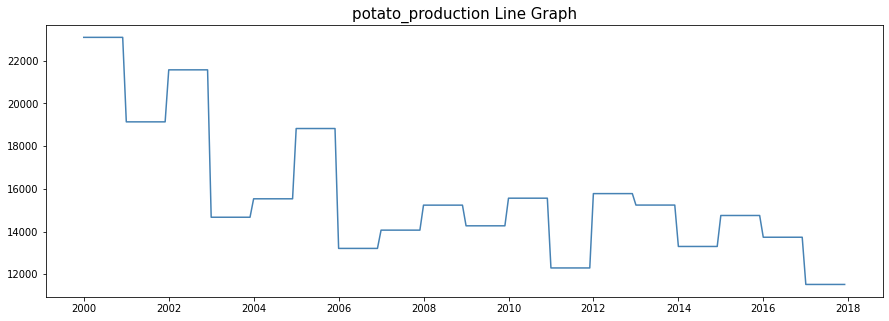

In [69]:
plt.figure(figsize=(15,5))
plt.plot(potato_area_prod['date'],potato_area_prod['production'], color='steelblue')
plt.title('potato_production Line Graph', fontsize=15) 

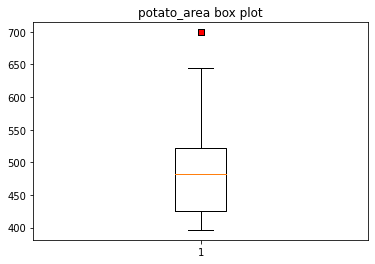

In [70]:
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(potato_area_prod['area'], flierprops=green_diamond)
plt.title("potato_area box plot")
plt.show()

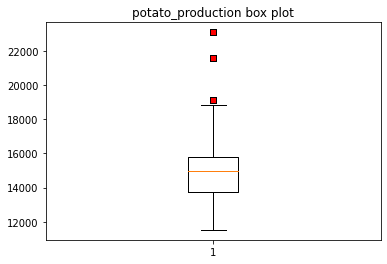

In [71]:
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(potato_area_prod['production'], flierprops=green_diamond)
plt.title("potato_production box plot")
plt.show()

In [72]:
potato_area_prod.describe()

,area,production
count,216.000000,216.000000
mean,495.185185,15655.833333
std,83.800758,3015.376713
min,396.500000,11520.750000
25%,426.083333,13733.000000
50%,481.500000,14994.375000
75%,522.750000,15777.083333
max,699.416667,23098.833333


In [73]:
potato_area_prod.loc[potato_area_prod['production'] >= 20000]

,date,area,production
0,2000-01-01,699.416667,23098.833333
1,2000-02-01,699.416667,23098.833333
2,2000-03-01,699.416667,23098.833333
3,2000-04-01,699.416667,23098.833333
4,2000-05-01,699.416667,23098.833333
5,2000-06-01,699.416667,23098.833333
6,2000-07-01,699.416667,23098.833333
7,2000-08-01,699.416667,23098.833333
8,2000-09-01,699.416667,23098.833333
9,2000-10-01,699.416667,23098.833333


- 감자 수입량과 생산량 관계

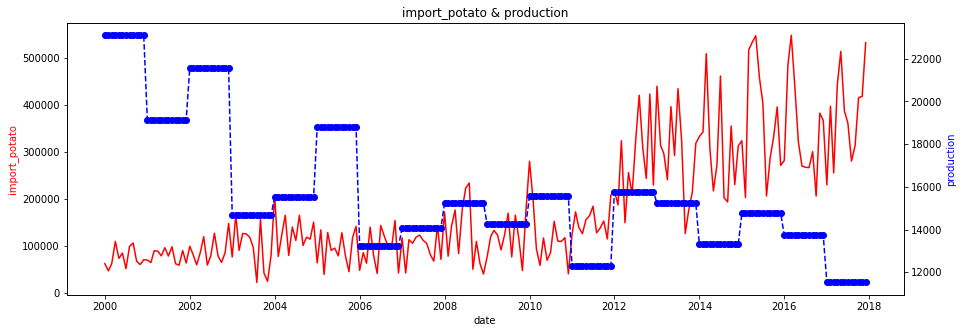

In [74]:
fig,ax=plt.subplots(figsize = (15,5))
plt.title('import_potato & production')
ax.plot(import_potato['date'], import_potato['import_potato'], color = 'red')
ax.set_xlabel('date')
ax.set_ylabel('import_potato', color = 'red')
ax2= ax.twinx()
ax2.plot(potato_area_prod['date'], potato_area_prod['production'], 'bo--')
ax2.set_ylabel('production', color = 'blue')
plt.show()

## sweet_area_prod

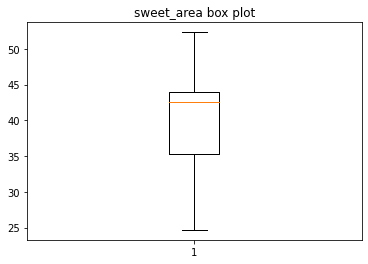

In [75]:
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(sweet_area_prod['area_sweet'], flierprops=green_diamond)
plt.title("sweet_area box plot")
plt.show()

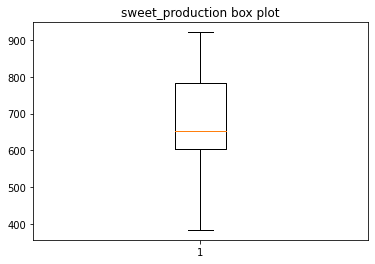

In [76]:
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(sweet_area_prod['production_sweet'], flierprops=green_diamond)
plt.title("sweet_production box plot")
plt.show()

## trend

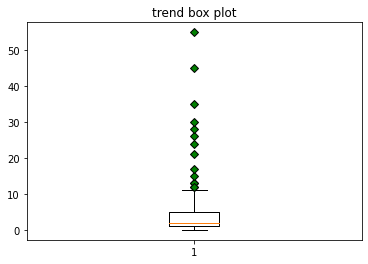

In [77]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(trend['trend'], flierprops=green_diamond)
plt.title("trend box plot")
plt.show()

In [78]:
trend.describe()

,trend
count,216.000000
mean,4.189815
std,6.827175
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,55.000000


In [79]:
trend['trend'].loc[trend['trend']>5].value_counts()

7.0     12
6.0      8
8.0      6
10.0     4
9.0      4
12.0     2
13.0     2
11.0     1
21.0     1
35.0     1
28.0     1
45.0     1
17.0     1
24.0     1
26.0     1
55.0     1
15.0     1
30.0     1
Name: trend, dtype: int64

In [80]:
trend.loc[trend['trend']>7]

,date,trend
17,2001-06-01,13.0
32,2002-09-01,10.0
44,2003-09-01,12.0
56,2004-09-01,9.0
78,2006-07-01,13.0
79,2006-08-01,10.0
112,2009-05-01,8.0
127,2010-08-01,10.0
128,2010-09-01,15.0
133,2011-02-01,8.0


Text(0.5, 1.0, 'trend Line Graph')

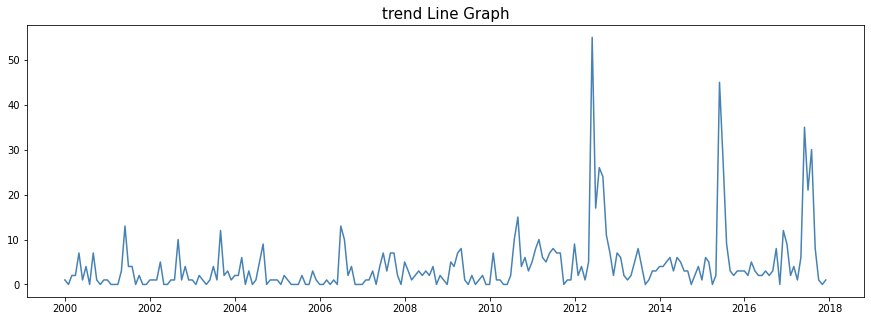

In [81]:
plt.figure(figsize=(15,5))
plt.plot(trend['date'],trend['trend'], color='steelblue')
plt.title('trend Line Graph', fontsize=15) 

## weather

- 평균 기온, 평균 최고 기온, 평균 최저 기온 이상치 확인

In [82]:
weather_data = [weather['avg_temp'], weather['avg_high_temp'], weather['avg_low_temp']]

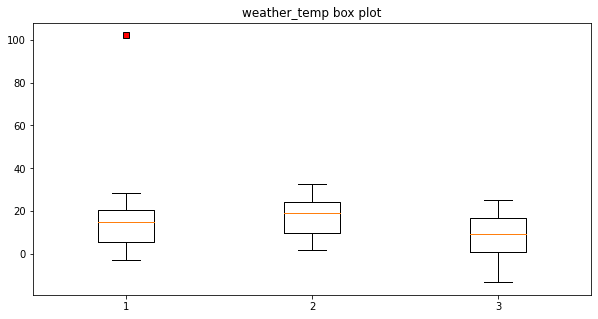

In [83]:
green_diamond = dict(markerfacecolor='r', marker='s')
plt.figure(figsize=(10,5))
plt.boxplot(weather_data, flierprops=green_diamond)
plt.title("weather_temp box plot")
plt.show()

- 평균 기온의 이상치 처리

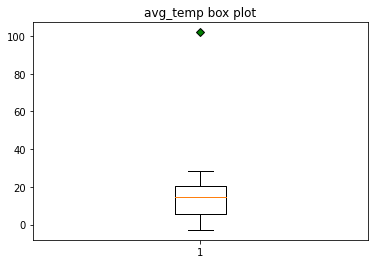

In [84]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(weather['avg_temp'], flierprops=green_diamond)
plt.title("avg_temp box plot")
plt.show()

In [85]:
weather.sort_values(by=['avg_temp'],ascending=False).head()

,date,avg_temp,avg_high_temp,avg_low_temp,rain,avg_hum,snow,avg_wind
168,2014-01-01,102.0,5.6,-9.4,44.6,46.0,36.3,2.2
163,2013-08-01,28.5,32.5,25.3,54.6,61.0,0.0,2.4
6,2000-07-01,27.2,31.9,23.4,86.4,67.0,0.0,2.5
162,2013-07-01,27.0,30.7,23.9,241.9,70.0,0.0,2.1
210,2017-07-01,26.8,30.1,23.9,238.1,68.0,0.0,2.0


In [86]:
from IPython.display import Image

![이상치 원래 값 확인](temp.png)

In [87]:
weather.at[168,'avg_temp'] = 2.3

In [88]:
weather.at[168,'avg_temp']

2.3

In [89]:
weather.loc[weather['avg_temp'] >= 100]

,date,avg_temp,avg_high_temp,avg_low_temp,rain,avg_hum,snow,avg_wind


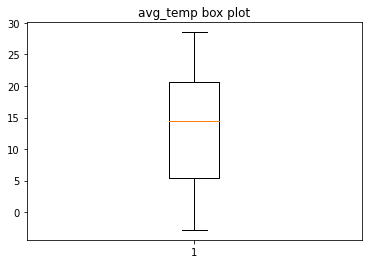

In [90]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(weather['avg_temp'], flierprops=green_diamond)
plt.title("avg_temp box plot")
plt.show()

- 평균 최고 기온 이상치 확인

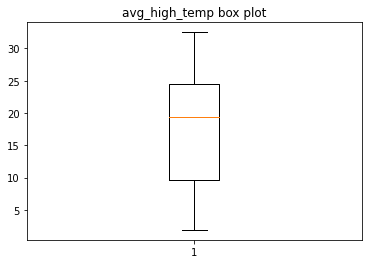

In [91]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(weather['avg_high_temp'], flierprops=green_diamond)
plt.title("avg_high_temp box plot")
plt.show()

- 평균 최고 온도가 10도 이하인 데이터 → 겨울(12, 1, 2 월)

In [92]:
weather.loc[weather['avg_high_temp'] <= 10]

,date,avg_temp,avg_high_temp,avg_low_temp,rain,avg_hum,snow,avg_wind
0,2000-01-01,0.8,4.9,-2.4,66.3,58.0,24.8,3.2
1,2000-02-01,0.9,5.9,-3.1,3.3,39.0,2.0,3.7
11,2000-12-01,4.1,9.2,-0.4,5.6,42.0,0.5,3.3
12,2001-01-01,-1.3,2.3,-4.9,101.0,48.0,10.5,3.6
13,2001-02-01,2.1,7.0,-2.0,97.6,52.0,23.6,3.1
23,2001-12-01,2.1,6.6,-1.3,21.1,38.0,11.1,3.6
24,2002-01-01,1.5,5.7,-2.1,78.0,53.0,6.9,3.9
25,2002-02-01,4.8,9.3,0.5,0.0,37.0,0.0,3.7
35,2002-12-01,2.6,6.2,-0.4,129.4,60.0,18.0,2.2
36,2003-01-01,-0.4,3.7,-4.0,60.2,49.0,36.8,3.4


- 평균 최고 온도가 25도 이상인 데이터 → 여름(6, 7, 8 월)

In [93]:
weather.loc[weather['avg_high_temp'] >= 25]

,date,avg_temp,avg_high_temp,avg_low_temp,rain,avg_hum,snow,avg_wind
5,2000-06-01,21.7,27.0,17.2,114.3,69.0,0.0,2.0
6,2000-07-01,27.2,31.9,23.4,86.4,67.0,0.0,2.5
7,2000-08-01,25.4,29.4,22.5,214.1,79.0,0.0,1.7
17,2001-06-01,22.1,26.6,18.8,121.3,67.0,0.0,2.2
18,2001-07-01,26.5,31.0,22.6,122.9,67.0,0.0,2.0
19,2001-08-01,24.6,29.0,21.2,81.2,74.0,0.0,2.0
29,2002-06-01,21.3,25.7,16.9,33.3,63.0,0.0,2.2
30,2002-07-01,23.6,26.8,20.7,224.7,76.0,0.0,1.8
31,2002-08-01,23.4,26.4,21.2,1137.0,78.0,0.0,2.1
43,2003-08-01,23.2,26.8,20.3,284.3,78.0,0.0,1.9


In [94]:
weather['year'] = weather['date'].dt.year # year column 만들기
weather['month'] = weather['date'].dt.month # month column 만들기

- 계절로 카테고리화
    - 12, 1, 2 → winter
    - 3, 4, 5 → spring
    - 6, 7, 8 → summer
    - 9, 10, 11 → autumn

In [95]:
bins=[0,2,5,8,11]
weather['season'] = pd.cut(weather['month'], bins, labels=['winter','spring','summer','autumn'])
weather['season'] = weather['season'].fillna('winter')
weather

,date,avg_temp,avg_high_temp,avg_low_temp,rain,avg_hum,snow,avg_wind,year,month,season
0,2000-01-01,0.8,4.9,-2.4,66.3,58.0,24.8,3.2,2000,1,winter
1,2000-02-01,0.9,5.9,-3.1,3.3,39.0,2.0,3.7,2000,2,winter
2,2000-03-01,8.1,13.8,2.9,15.9,41.0,0.0,3.7,2000,3,spring
3,2000-04-01,12.6,18.1,7.2,37.1,50.0,0.0,3.6,2000,4,spring
4,2000-05-01,17.0,22.2,12.6,47.6,70.0,0.0,2.2,2000,5,spring
...,...,...,...,...,...,...,...,...,...,...,...
211,2017-08-01,24.3,27.4,21.6,444.1,75.0,0.0,1.6,2017,8,summer
212,2017-09-01,21.3,25.9,17.2,45.7,61.0,0.0,2.3,2017,9,autumn
213,2017-10-01,15.2,19.2,11.8,114.5,67.0,0.0,1.9,2017,10,autumn
214,2017-11-01,9.0,13.6,4.6,41.5,38.0,0.0,3.0,2017,11,autumn


- 날씨와 가격 상관관계 확인

In [96]:
weather_price = pd.merge(weather,price, how='right',on='date')

In [97]:
weather_price

,date,avg_temp,avg_high_temp,avg_low_temp,rain,avg_hum,snow,avg_wind,year,month,season,price
0,2000-01-01,0.8,4.9,-2.4,66.3,58.0,24.8,3.2,2000,1,winter,15096.000000
1,2000-02-01,0.9,5.9,-3.1,3.3,39.0,2.0,3.7,2000,2,winter,14860.869570
2,2000-03-01,8.1,13.8,2.9,15.9,41.0,0.0,3.7,2000,3,spring,13538.461540
3,2000-04-01,12.6,18.1,7.2,37.1,50.0,0.0,3.6,2000,4,spring,9460.869565
4,2000-05-01,17.0,22.2,12.6,47.6,70.0,0.0,2.2,2000,5,spring,9141.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
211,2017-08-01,24.3,27.4,21.6,444.1,75.0,0.0,1.6,2017,8,summer,39854.545450
212,2017-09-01,21.3,25.9,17.2,45.7,61.0,0.0,2.3,2017,9,autumn,41276.190480
213,2017-10-01,15.2,19.2,11.8,114.5,67.0,0.0,1.9,2017,10,autumn,42775.000000
214,2017-11-01,9.0,13.6,4.6,41.5,38.0,0.0,3.0,2017,11,autumn,42236.363640


In [98]:
spring = weather_price.loc[weather_price['season'] == 'spring']
summer = weather_price.loc[weather_price['season'] == 'summer']
autumn = weather_price.loc[weather_price['season'] == 'autumn']
winter = weather_price.loc[weather_price['season'] == 'winter']

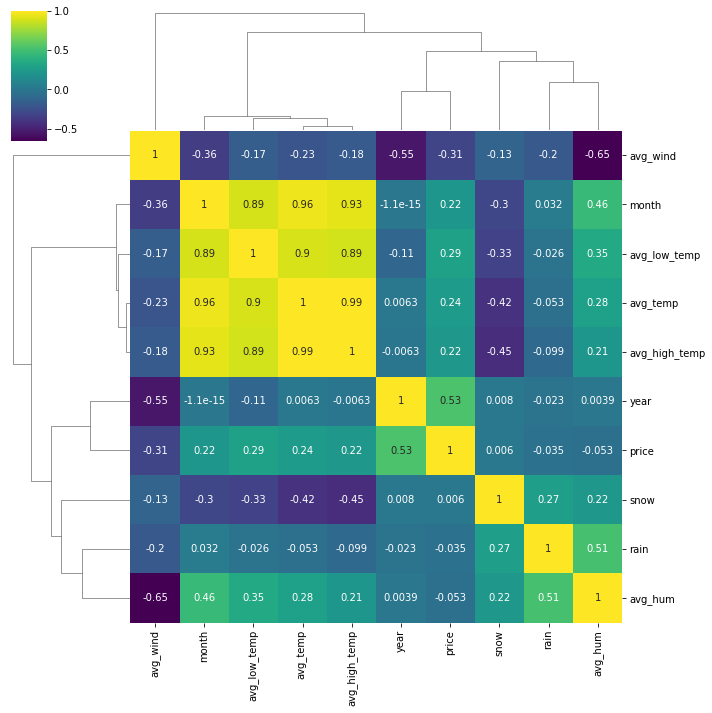

In [99]:
sns.clustermap(spring.corr(), annot=True, cmap='viridis')

In [100]:
summer = summer.drop(['snow'],axis=1)

summer 의 snow data 값이 모두 0이라 clustermap 적용 불가했다. 칼럼 제거했음.

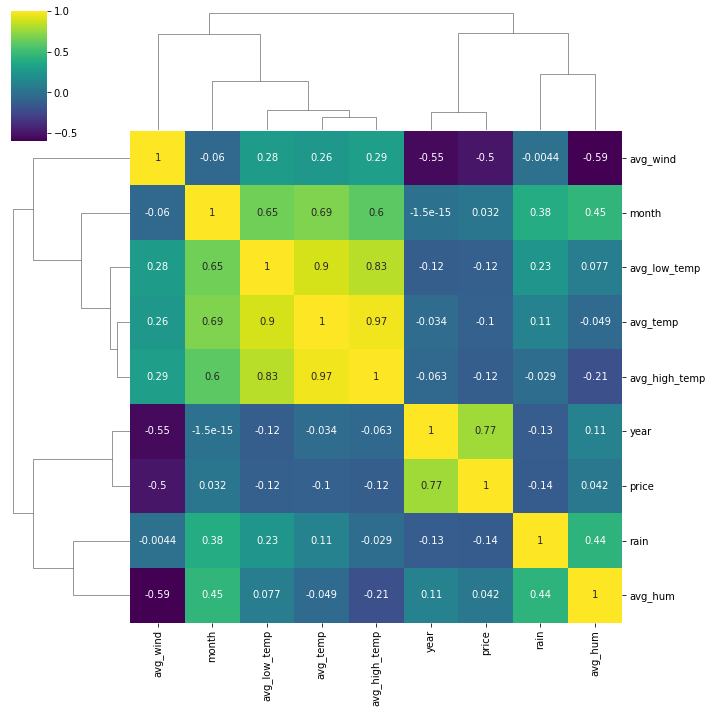

In [101]:
sns.clustermap(summer.corr(), annot=True, cmap='viridis')

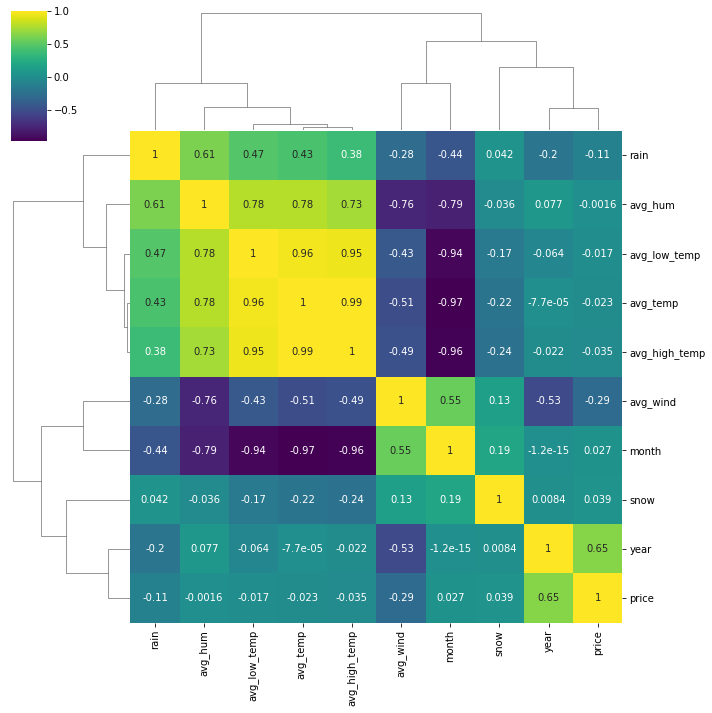

In [102]:
sns.clustermap(autumn.corr(), annot=True, cmap='viridis')

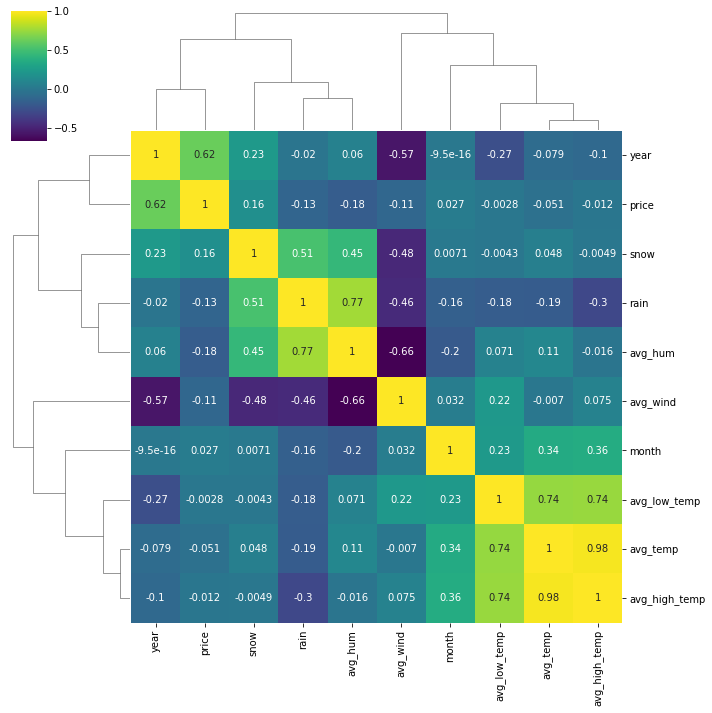

In [103]:
sns.clustermap(winter.corr(), annot=True, cmap='viridis')

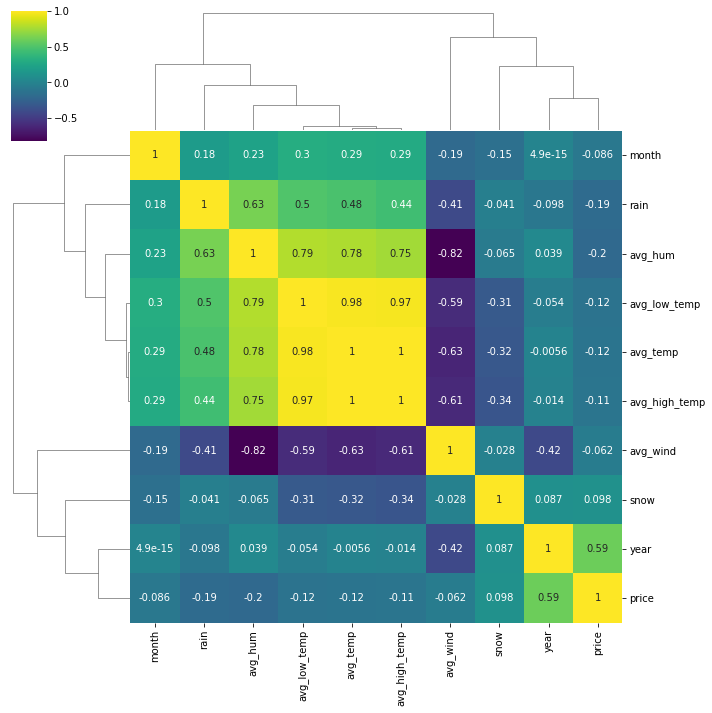

In [104]:
sns.clustermap(weather_price.corr(), annot=True, cmap='viridis')

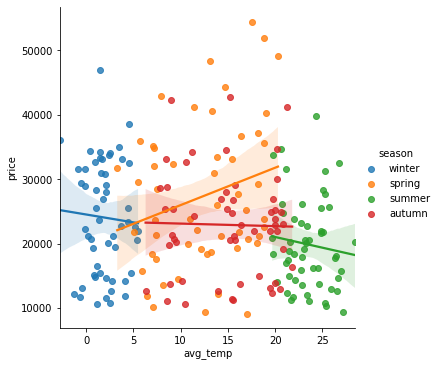

In [105]:
sns.lmplot(x = 'avg_temp', y = 'price', data = weather_price, hue = 'season')

<AxesSubplot:>

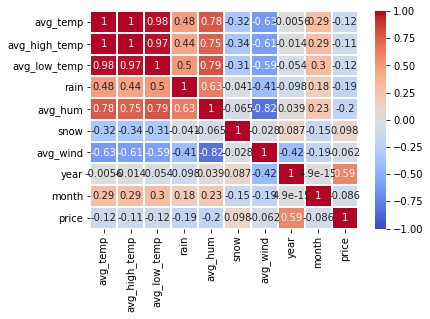

In [106]:
sns.heatmap(weather_price.corr(), linewidths=0.2, cmap = 'coolwarm', vmin = -1, vmax=1, mask=None, linecolor='white', annot=True)

- 평균 최저 기온 이상치 확인

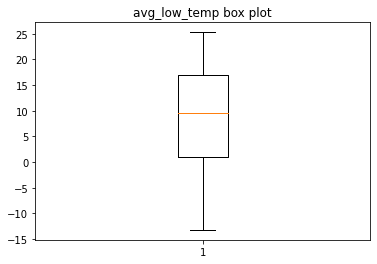

In [107]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(weather['avg_low_temp'], flierprops=green_diamond)
plt.title("avg_low_temp box plot")
plt.show()

- 강수량 이상치 확인

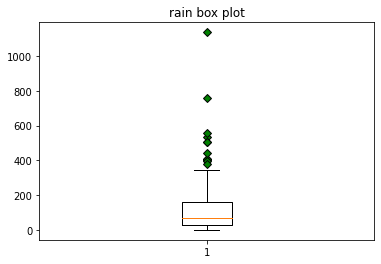

In [108]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(weather['rain'], flierprops=green_diamond)
plt.title("rain box plot")
plt.show()

In [109]:
from IPython.display import Image

![이상치 원래 값 확인](rain.png)

- 평균 상대 습도 이상치 확인

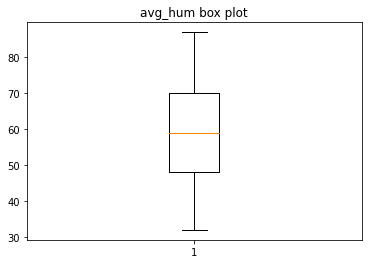

In [110]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(weather['avg_hum'], flierprops=green_diamond)
plt.title("avg_hum box plot")
plt.show()

- 평균 풍속 이상치 확인

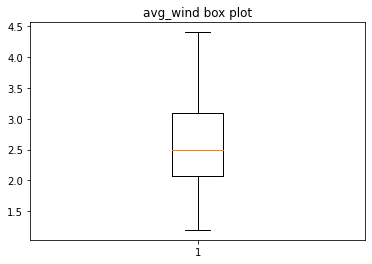

In [111]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(weather['avg_wind'], flierprops=green_diamond)
plt.title("avg_wind box plot")
plt.show()

- 최심신적설 이상치 확인

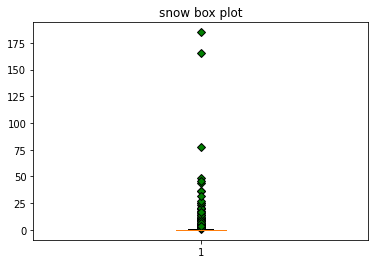

In [112]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(weather['snow'], flierprops=green_diamond)
plt.title("snow box plot")
plt.show()

In [113]:
weather = weather.drop(['snow'],axis = 1)

최심신적설량은 자연재해 데이터로 대체하기로 함.

In [114]:
weather.columns

Index(['date', 'avg_temp', 'avg_high_temp', 'avg_low_temp', 'rain', 'avg_hum',
       'avg_wind', 'year', 'month', 'season'],
      dtype='object')

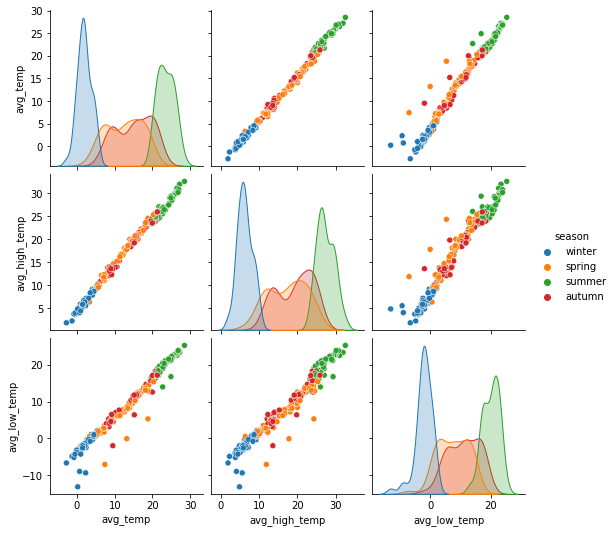

In [115]:
sns.pairplot(weather, vars = ['avg_temp', 'avg_high_temp', 'avg_low_temp'], hue = 'season')

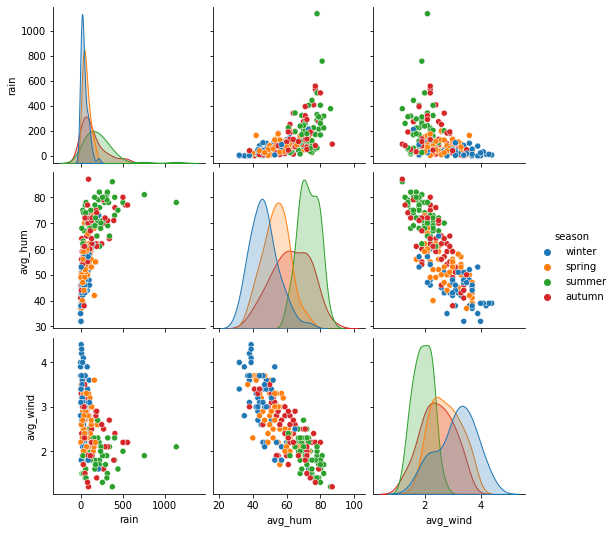

In [116]:
sns.pairplot(weather, vars = ['rain', 'avg_hum', 'avg_wind'], hue = 'season')

## damage

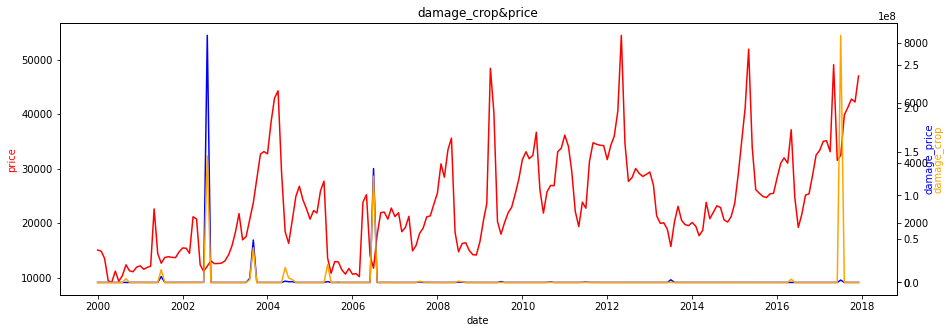

In [117]:
fig,ax=plt.subplots(figsize = (15,5))
plt.title('damage_crop&price')
ax.plot(price['date'], price['price'], color = 'red')
ax.set_xlabel('date')
ax.set_ylabel('price', color = 'red')
ax2= ax.twinx()
ax2.plot(damage['date'], damage['damage_price'], color = 'blue')
ax2.set_ylabel('damage_price', color = 'blue')
ax3= ax.twinx()
ax3.plot(damage['date'], damage['damage_crop'], color = 'orange')
ax3.set_ylabel('damage_crop', color = 'orange')
plt.show()

## price

Text(0.5, 1.0, 'price Line Plot')

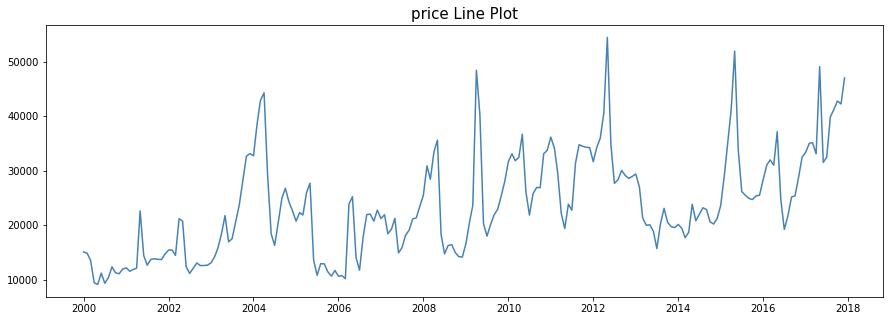

In [118]:
plt.figure(figsize=(15,5))
plt.plot(price['date'],price['price'], color='steelblue')
plt.title("price Line Plot", fontsize=15)

In [119]:
price.describe()

,price
count,216.000000
mean,23583.524816
std,9276.042651
min,9141.666667
25%,15870.285717
50%,21972.924900
75%,29454.545455
max,54457.142860


In [120]:
price.sort_values(by=['price'],ascending=False).head()

,date,price
148,2012-05-01,54457.14286
184,2015-05-01,51922.22222
208,2017-05-01,49073.68421
111,2009-04-01,48418.18182
215,2017-12-01,47010.52632


# DataFrame 만들기

In [121]:
df1 = pd.merge(import_potato,weather, how='right',on='date')

In [122]:
df1 = pd.get_dummies(df1, columns=['month','season'])
df1 # month 와 season 원-핫 인코딩

,date,import_potato,avg_temp,avg_high_temp,avg_low_temp,rain,avg_hum,avg_wind,year,month_1,...,month_7,month_8,month_9,month_10,month_11,month_12,season_winter,season_spring,season_summer,season_autumn
0,2000-01-01,62115.0,0.8,4.9,-2.4,66.3,58.0,3.2,2000,1,...,0,0,0,0,0,0,1,0,0,0
1,2000-02-01,46733.0,0.9,5.9,-3.1,3.3,39.0,3.7,2000,0,...,0,0,0,0,0,0,1,0,0,0
2,2000-03-01,62221.0,8.1,13.8,2.9,15.9,41.0,3.7,2000,0,...,0,0,0,0,0,0,0,1,0,0
3,2000-04-01,109549.0,12.6,18.1,7.2,37.1,50.0,3.6,2000,0,...,0,0,0,0,0,0,0,1,0,0
4,2000-05-01,73318.0,17.0,22.2,12.6,47.6,70.0,2.2,2000,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2017-08-01,280734.0,24.3,27.4,21.6,444.1,75.0,1.6,2017,0,...,0,1,0,0,0,0,0,0,1,0
212,2017-09-01,314027.0,21.3,25.9,17.2,45.7,61.0,2.3,2017,0,...,0,0,1,0,0,0,0,0,0,1
213,2017-10-01,416119.0,15.2,19.2,11.8,114.5,67.0,1.9,2017,0,...,0,0,0,1,0,0,0,0,0,1
214,2017-11-01,418646.0,9.0,13.6,4.6,41.5,38.0,3.0,2017,0,...,0,0,0,0,1,0,0,0,0,1


In [123]:
df1.fillna(0, inplace=True)
df1.isnull().sum()

date             0
import_potato    0
avg_temp         0
avg_high_temp    0
avg_low_temp     0
rain             0
avg_hum          0
avg_wind         0
year             0
month_1          0
month_2          0
month_3          0
month_4          0
month_5          0
month_6          0
month_7          0
month_8          0
month_9          0
month_10         0
month_11         0
month_12         0
season_winter    0
season_spring    0
season_summer    0
season_autumn    0
dtype: int64

In [124]:
df2 = pd.merge(import_sweet,df1, how='right',on='date')

In [125]:
df2.fillna(0, inplace=True)
df2.isnull().sum()

date             0
import_sweet     0
import_potato    0
avg_temp         0
avg_high_temp    0
avg_low_temp     0
rain             0
avg_hum          0
avg_wind         0
year             0
month_1          0
month_2          0
month_3          0
month_4          0
month_5          0
month_6          0
month_7          0
month_8          0
month_9          0
month_10         0
month_11         0
month_12         0
season_winter    0
season_spring    0
season_summer    0
season_autumn    0
dtype: int64

In [126]:
df3 = pd.merge(df2,inflation, how='left',on='date')

In [127]:
df4 = pd.merge(df3,oil, how='right',on='date')

In [128]:
df5 = pd.merge(df4,sweet_area_prod, how='right',on='date')

In [129]:
df6 = pd.merge(df5,trend, how='right',on='date')

In [130]:
df7 = pd.merge(df6,damage, how='right',on='date')

In [131]:
df8 = pd.merge(df7,potato_area_prod, how='right',on='date')

In [132]:
df9 = pd.merge(df8,price, how='right',on='date')

In [133]:
df9.columns

Index(['date', 'import_sweet', 'import_potato', 'avg_temp', 'avg_high_temp',
       'avg_low_temp', 'rain', 'avg_hum', 'avg_wind', 'year', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_winter', 'season_spring', 'season_summer', 'season_autumn',
       'CIR', 'food_non_bever', 'oil_price', 'area_sweet', 'production_sweet',
       'trend', 'damage_price', 'damage_crop', 'area', 'production', 'price'],
      dtype='object')

# 상관관계 분석하기

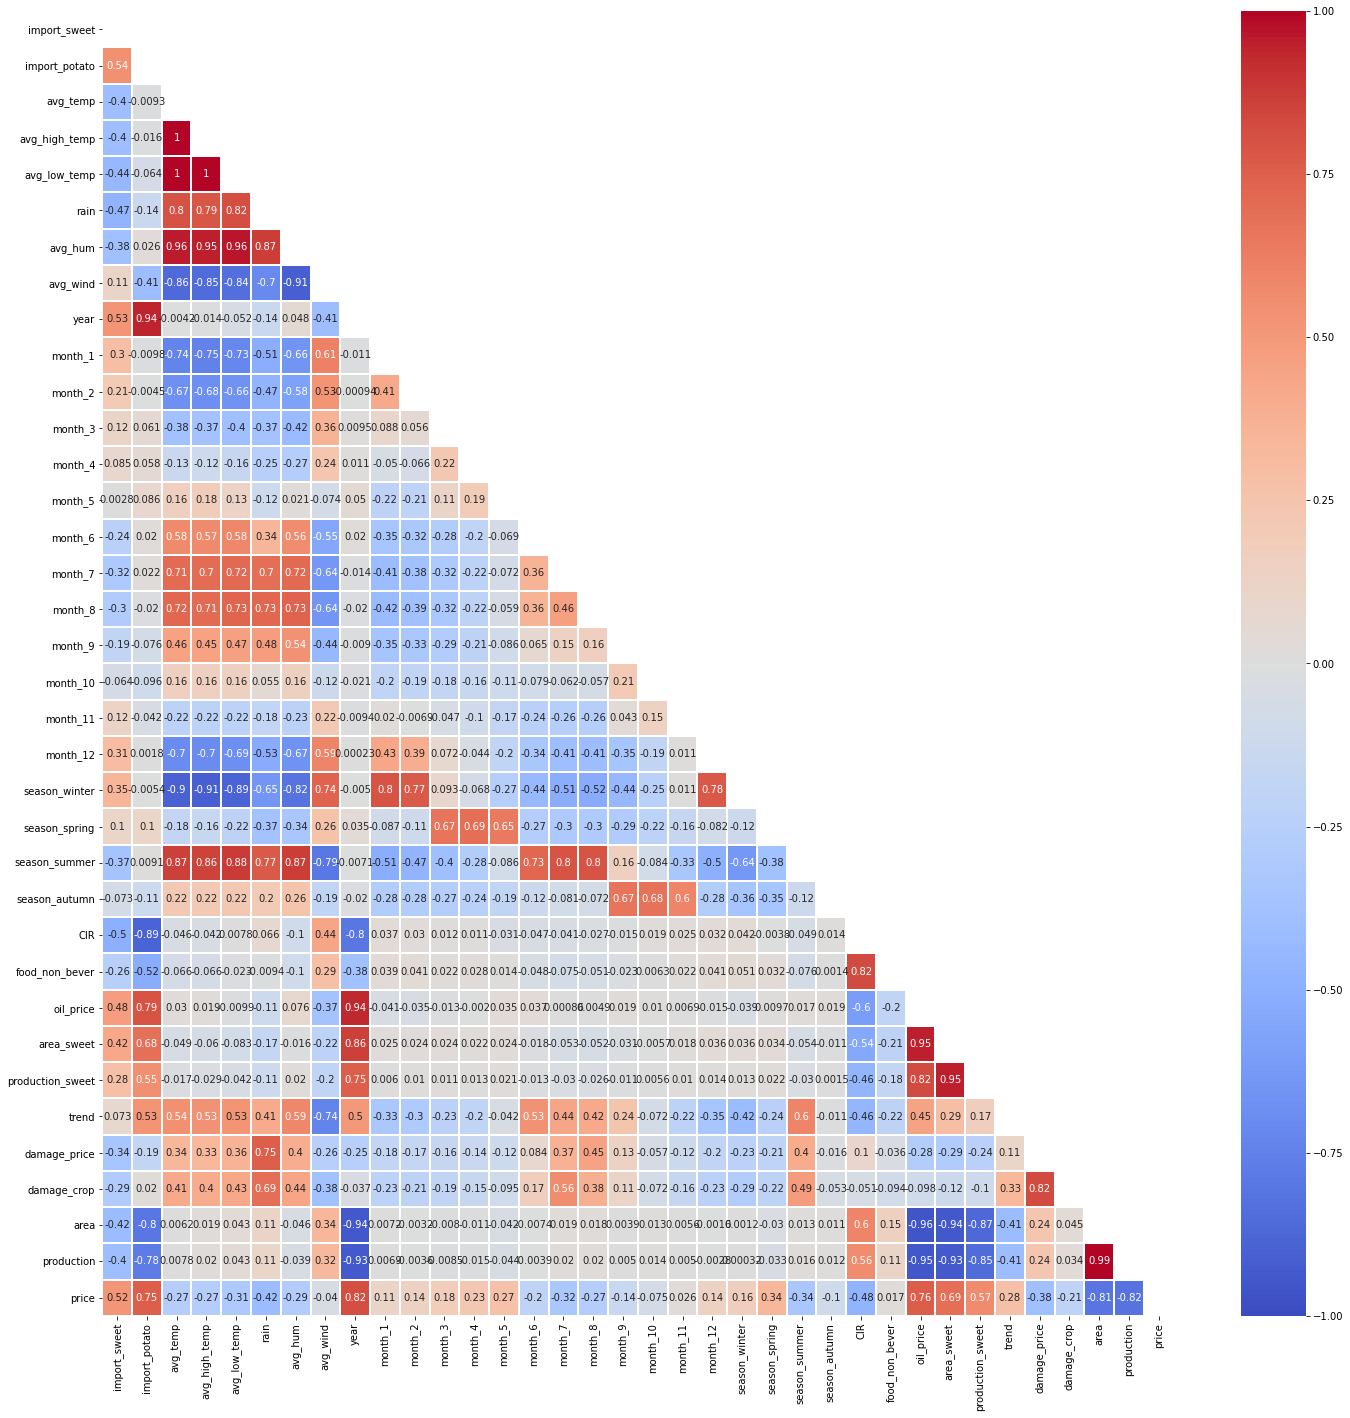

In [134]:
df_corr = df9.copy()
df_corr = df_corr.corr()
fig, ax = plt.subplots( figsize=(24,24) )
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr.corr(), linewidths=0.2, cmap = 'coolwarm', vmin = -1, vmax=1, mask=mask, linecolor='white', annot=True)
plt.savefig('heatmap.png')
plt.show()

- production 과 price 의 다른 변수들과의 상관관계
    - production : import_sweet, import_potato, avg_wind, year, CIR, oil_price, area_sweet, production_sweet, trend, damage_price, area, price
    - price : import_sweet, import_potato, avg_temp, avg_high_temp, avg_low_temp, rain, avg_hum, year, month4~8, season_winter, season_summer, CIR, oil_pice, area_sweet, production_sweet, trend, damage_price, damage_crop, area, production
    

# 정규화 및 모델 적용하기

- 정규화
    - standard
    - minmax
    - one-hot encoding

- 모델 종류
    - linear_regression
    - decision_tree
    - random_forest
    - rnn_lstm

## Machine Learning

### 정규화_ML

In [135]:
df9.index = df9['date']
df10 = df9.drop(['date'], axis=1)

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df10)
df = scaler.transform(df10)
df = pd.DataFrame(df)
df.index = df10.index
df.columns = df10.columns

In [137]:
df.columns

Index(['import_sweet', 'import_potato', 'avg_temp', 'avg_high_temp',
       'avg_low_temp', 'rain', 'avg_hum', 'avg_wind', 'year', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_winter', 'season_spring', 'season_summer', 'season_autumn',
       'CIR', 'food_non_bever', 'oil_price', 'area_sweet', 'production_sweet',
       'trend', 'damage_price', 'damage_crop', 'area', 'production', 'price'],
      dtype='object')

### train/test data set 만들기

- 생각해보기
    - 시계열 데이터이므로 train/test 시간 순서대로 자르기!
    -  18년치 데이터니까 train/test : 14/4

In [138]:
x = df.drop(['price'],axis = 1)
y = df.drop(['import_sweet', 'import_potato', 'avg_temp', 'avg_high_temp',
       'avg_low_temp', 'rain', 'avg_hum', 'avg_wind', 'year', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_winter', 'season_spring', 'season_summer', 'season_autumn',
       'CIR', 'food_non_bever', 'oil_price', 'area_sweet', 'production_sweet',
       'trend', 'damage_price', 'damage_crop', 'area', 'production'],axis = 1)

- train/test = 14/4

In [139]:
x_train = x[:168]
x_train = np.array(x_train)
x_test = x[168:]
x_test = np.array(x_test)
y_train = y[:168]
y_train = np.array(y_train)
y_test = y[168:]
y_test = np.array(y_test)

In [140]:
import numpy as np
y_test = np.array(y_test)

### Linear Regression

Model			 RMSE 		 R2
LinearRegression 	 0.20 		-0.11


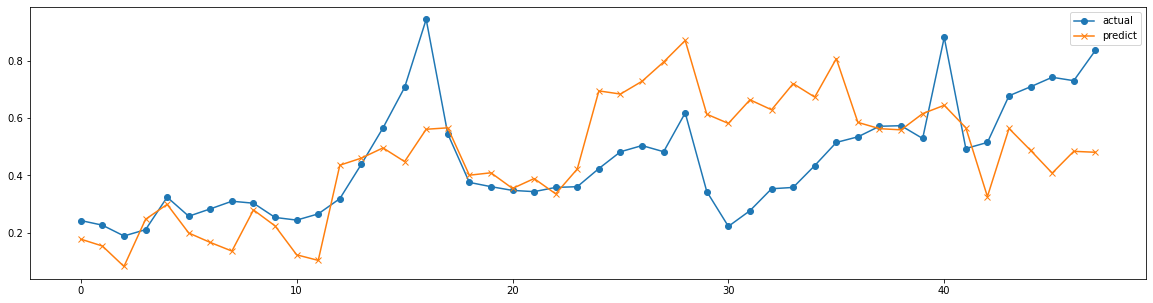

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print("Model\t\t\t RMSE \t\t R2")
print("LinearRegression \t {:.2f} \t\t{:.2f}".format(np.sqrt(mean_squared_error(y_test, pred_lr)), r2_score(y_test, pred_lr)))

fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(20,5)

ax1.plot(y_test, marker = "o" , label = "actual")
ax1.plot(pred_lr, marker = "x", label = "predict")
ax1.legend(prop={'size':10})

In [142]:
pred_lr

array([[0.17807744],
       [0.15414948],
       [0.08295207],
       [0.24732364],
       [0.299276  ],
       [0.19953616],
       [0.1665201 ],
       [0.13655107],
       [0.27986994],
       [0.22418805],
       [0.12347025],
       [0.10405719],
       [0.43581909],
       [0.46053655],
       [0.4960923 ],
       [0.44841093],
       [0.56102702],
       [0.56603605],
       [0.4009378 ],
       [0.40933947],
       [0.3547868 ],
       [0.38922509],
       [0.33594345],
       [0.42251576],
       [0.694765  ],
       [0.68372612],
       [0.72829677],
       [0.79553196],
       [0.87042222],
       [0.61347325],
       [0.58141275],
       [0.66371352],
       [0.6288982 ],
       [0.72010681],
       [0.67313593],
       [0.80700968],
       [0.58499318],
       [0.56309443],
       [0.55899019],
       [0.61557778],
       [0.64457309],
       [0.56626852],
       [0.32637576],
       [0.56373676],
       [0.48759642],
       [0.40821705],
       [0.48414595],
       [0.480

### Decision Tree Regression

Model				 RMSE 		 R2
Decision Tree Regressor 	 0.30 		-1.51


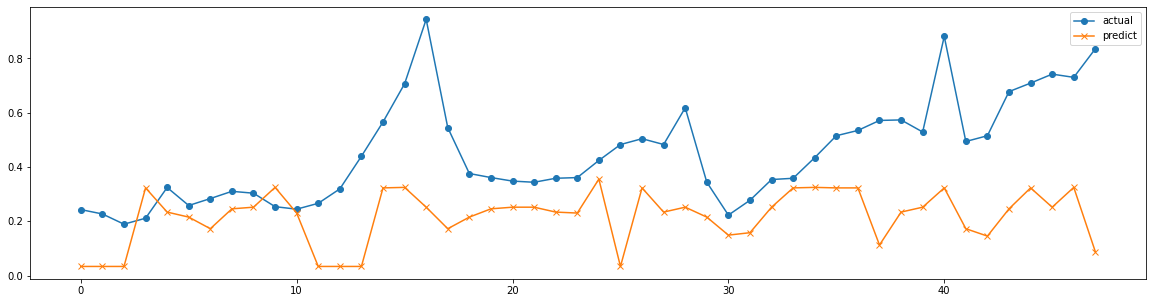

In [143]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor() 
dt.fit(x_train, y_train) 
pred_dt = dt.predict(x_test)
print("Model\t\t\t\t RMSE \t\t R2") 
print("Decision Tree Regressor \t {:.2f} \t\t{:.2f}".format(np.sqrt(mean_squared_error(y_test, pred_dt)), r2_score(y_test, pred_dt)))

fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(20,5)

ax1.plot(y_test, marker = "o" , label = "actual")
ax1.plot(pred_dt, marker = "x", label = "predict")
ax1.legend(prop={'size':10})

In [144]:
pred_dt

array([0.03338548, 0.03338548, 0.03338548, 0.32289733, 0.23373177,
       0.21522603, 0.17249442, 0.24571128, 0.25180612, 0.32479706,
       0.23015894, 0.03338548, 0.03338548, 0.03338548, 0.32289733,
       0.32479706, 0.25180612, 0.17249442, 0.21522603, 0.24571128,
       0.25180612, 0.25180612, 0.23373177, 0.23015894, 0.35525023,
       0.03338548, 0.32289733, 0.23373177, 0.25180612, 0.21522603,
       0.14882438, 0.15774596, 0.25180612, 0.32289733, 0.32479706,
       0.32289733, 0.32289733, 0.11239242, 0.23373177, 0.25180612,
       0.32289733, 0.17249442, 0.14520585, 0.24571128, 0.32289733,
       0.25180612, 0.32479706, 0.08761539])

### Random Forest Regression

Model				 RMSE 		 R2
Random Forest Regressor 	 0.21 		-0.25


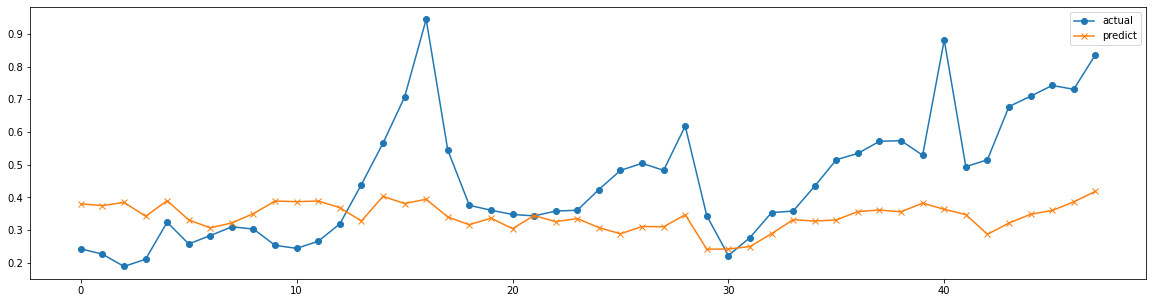

In [145]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train.ravel())
pred_rf = rf.predict(x_test)
print("Model\t\t\t\t RMSE \t\t R2")
print("Random Forest Regressor \t {:.2f} \t\t{:.2f}".format(np.sqrt(mean_squared_error(y_test, pred_rf)), r2_score(y_test, pred_rf)))

fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(20,5)

ax1.plot(y_test, marker = "o" , label = "actual")
ax1.plot(pred_rf, marker = "x", label = "predict")
ax1.legend(prop={'size':10})

In [146]:
pred_rf

array([0.38048521, 0.37493425, 0.38503839, 0.34261451, 0.38995755,
       0.33127339, 0.30711916, 0.32218453, 0.35072891, 0.38896318,
       0.38705823, 0.38909649, 0.36892517, 0.3279061 , 0.40322561,
       0.38137448, 0.39445601, 0.34030811, 0.31655932, 0.33687179,
       0.30454344, 0.34471797, 0.32600671, 0.33545795, 0.3078486 ,
       0.28900161, 0.3110946 , 0.31045403, 0.34712073, 0.24188284,
       0.24247856, 0.2498837 , 0.28924841, 0.33211114, 0.32777791,
       0.33130067, 0.3568391 , 0.36151714, 0.35612056, 0.38261779,
       0.3637161 , 0.34757353, 0.28744994, 0.3218493 , 0.34855181,
       0.36014663, 0.38634702, 0.41850237])

## LSTM

### 정규화_LSTM

In [147]:
df9.index = df9['date']
df10 = df9.drop(['date'], axis=1)

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df10)
df = scaler.transform(df10)
df = pd.DataFrame(df)
df.index = df10.index
df.columns = df10.columns

### train/test data set 만들기

In [149]:
TEST_SIZE = 60
WINDOW_SIZE = 12

train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

def make_dataset(data, label, window_size=12):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [150]:
print(df.columns)

Index(['import_sweet', 'import_potato', 'avg_temp', 'avg_high_temp',
       'avg_low_temp', 'rain', 'avg_hum', 'avg_wind', 'year', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_winter', 'season_spring', 'season_summer', 'season_autumn',
       'CIR', 'food_non_bever', 'oil_price', 'area_sweet', 'production_sweet',
       'trend', 'damage_price', 'damage_crop', 'area', 'production', 'price'],
      dtype='object')


- train데이터를 train_feature/train_label으로 나눈 후 train / validation 으로 나누기

In [151]:
from sklearn.model_selection import train_test_split

feature_cols = ['import_sweet', 'import_potato', 'avg_temp', 'avg_high_temp',
       'avg_low_temp', 'rain', 'avg_hum', 'avg_wind', 'year', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_winter', 'season_spring', 'season_summer', 'season_autumn',
       'CIR', 'food_non_bever', 'oil_price', 'area_sweet', 'production_sweet',
       'trend', 'damage_price', 'damage_crop', 'area', 'production']
label_cols = ['price']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label,12)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((115, 12, 35), (29, 12, 35))

- test 데이터를 test_feature / test_label로 나누기

In [152]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 12)

test_feature.shape, test_label.shape

((48, 12, 35), (48, 1))

### LSTM 모델 학습 및 예측

Epoch 1/1000
10/10 [==============================] - 0s 35ms/step - loss: 0.0458 - val_loss: 0.0572
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0334 - val_loss: 0.0322
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.0280
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.0290
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0166 - val_loss: 0.0278
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0166 - val_loss: 0.0278
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0167 - val_loss: 0.0222
Epoch 8/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0149 - val_loss: 0.0252
Epoch 9/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0145 - val_loss: 0.0274
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.023

10/10 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0166
Epoch 83/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0154
Epoch 84/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0156
Epoch 85/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 0.0167
Epoch 86/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0169
Epoch 87/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 0.0138
Epoch 88/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0127
Epoch 89/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0140
Epoch 90/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0163
Epoch 91/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0146
Epoc

10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0115
Epoch 163/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0113
Epoch 164/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0110
Epoch 165/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0109
Epoch 166/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0113
Epoch 167/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0100
Epoch 168/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0111
Epoch 169/1000
10/10 [==============================] - 0s 6ms/step - loss: 9.2989e-04 - val_loss: 0.0096
Epoch 170/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0105
Epoch 171/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss

10/10 [==============================] - 0s 6ms/step - loss: 8.6464e-04 - val_loss: 0.0087
Epoch 242/1000
10/10 [==============================] - 0s 6ms/step - loss: 7.8312e-04 - val_loss: 0.0096
Epoch 243/1000
10/10 [==============================] - 0s 6ms/step - loss: 8.6377e-04 - val_loss: 0.0083
Epoch 244/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0116
Epoch 245/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0093
Epoch 246/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0092
Epoch 247/1000
10/10 [==============================] - 0s 6ms/step - loss: 6.0489e-04 - val_loss: 0.0089
Epoch 248/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0089
Epoch 249/1000
10/10 [==============================] - 0s 6ms/step - loss: 8.9583e-04 - val_loss: 0.0090
Epoch 250/1000
10/10 [==============================] - 0s 6ms/step - loss: 7

10/10 [==============================] - 0s 6ms/step - loss: 8.3208e-04 - val_loss: 0.0089
Epoch 320/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0081
Epoch 321/1000
10/10 [==============================] - 0s 6ms/step - loss: 7.7692e-04 - val_loss: 0.0079
Epoch 322/1000
10/10 [==============================] - 0s 6ms/step - loss: 5.2722e-04 - val_loss: 0.0077
Epoch 323/1000
10/10 [==============================] - 0s 6ms/step - loss: 6.7029e-04 - val_loss: 0.0085
Epoch 324/1000
10/10 [==============================] - 0s 6ms/step - loss: 7.0644e-04 - val_loss: 0.0086
Epoch 325/1000
10/10 [==============================] - 0s 6ms/step - loss: 9.4831e-04 - val_loss: 0.0097
Epoch 326/1000
10/10 [==============================] - 0s 6ms/step - loss: 7.9271e-04 - val_loss: 0.0089
Epoch 327/1000
10/10 [==============================] - 0s 6ms/step - loss: 8.4790e-04 - val_loss: 0.0088
Epoch 328/1000
10/10 [==============================] - 0s 6ms/st

<AxesSubplot:>

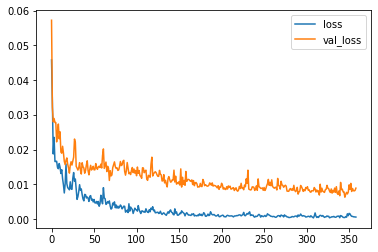

In [153]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD,Adadelta,Adam,RMSprop 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

# input shape에 전처리된 x_train을 넣는다
# Drop-out 20%
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128,input_shape=(x_train.shape[1] , x_train.shape[2])))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')


esc = EarlyStopping(monitor='loss', patience=50)

# 10개의 batch / 100번 epoch
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=10, epochs=1000, callbacks=[esc])

pd.DataFrame.from_dict(history.history).plot()

In [154]:
pred = model.predict(test_feature)
pred.shape

(48, 1)

In [155]:
test_label.shape

(48, 1)

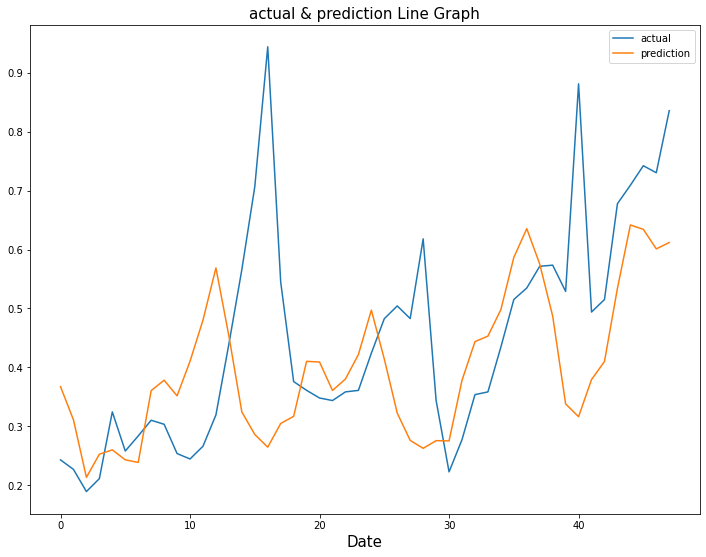

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.title('actual & prediction Line Graph', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.legend()
plt.show()

#  결과 (정규화 풀어주기)

## Machine Learning

### Linear Regression

In [157]:
pred_lr = pd.DataFrame(pred_lr)
pred_lr.index = df9['date'][-48:] # 테스트 데이터는 -48부터 끝까지

In [158]:
x_test.shape

(48, 35)

In [159]:
x_test_new = df9[-48:]
x_test_new = x_test_new.drop(['price'], axis = 1)
x_test_new = x_test_new.drop(['date'], axis = 1)

In [160]:
new_test = x_test_new.join(pred_lr) # x_test와 pred 합치기

In [161]:
new_test.columns = ['import_sweet', 'import_potato', 'avg_temp', 'avg_high_temp',
       'avg_low_temp', 'rain', 'avg_hum', 'avg_wind', 'year', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_winter', 'season_spring', 'season_summer', 'season_autumn',
       'CIR', 'food_non_bever', 'oil_price', 'area_sweet', 'production_sweet',
       'trend', 'damage_price', 'damage_crop', 'area', 'production', 'price']

In [162]:
i_test = scaler.inverse_transform(new_test) # 정규화 풀어주기
i_test = pd.DataFrame(i_test)

In [163]:
i_pred=i_test[35] # i_test 35번째 칼럼을 i_pred 으로 지정
i_pred=np.array(i_pred)

#### Linear Regression result

In [164]:
df11 = df10['price']
np.sqrt(mean_squared_error(df11[-48:], i_pred))

8888.374047068723

### Decision Tree Regression

In [165]:
pred_dt = pd.DataFrame(pred_dt)
pred_dt.index = df9['date'][-48:] # 테스트 데이터는 -48부터 끝까지

In [166]:
x_test.shape

(48, 35)

In [167]:
x_test_new = df9[-48:]
x_test_new = x_test_new.drop(['price'], axis = 1)
x_test_new = x_test_new.drop(['date'], axis = 1)

In [168]:
new_test = x_test_new.join(pred_dt) # x_test와 pred 합치기

In [169]:
new_test.columns = ['import_sweet', 'import_potato', 'avg_temp', 'avg_high_temp',
       'avg_low_temp', 'rain', 'avg_hum', 'avg_wind', 'year', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_winter', 'season_spring', 'season_summer', 'season_autumn',
       'CIR', 'food_non_bever', 'oil_price', 'area_sweet', 'production_sweet',
       'trend', 'damage_price', 'damage_crop', 'area', 'production', 'price']

In [170]:
i_test = scaler.inverse_transform(new_test) # 정규화 풀어주기
i_test = pd.DataFrame(i_test)

In [171]:
i_pred=i_test[35] # i_test 35번째 칼럼을 i_pred 으로 지정
i_pred=np.array(i_pred)

#### Decision Tree Regression result

In [172]:
df11 = df10['price']
np.sqrt(mean_squared_error(df11[-48:], i_pred))

13401.463363044008

### Random Forest Regression

In [173]:
pred_rf = pd.DataFrame(pred_rf)
pred_rf.index = df9['date'][-48:] # 테스트 데이터는 -48부터 끝까지

In [174]:
x_test.shape

(48, 35)

In [175]:
x_test_new = df9[-48:]
x_test_new = x_test_new.drop(['price'], axis = 1)
x_test_new = x_test_new.drop(['date'], axis = 1)

In [176]:
new_test = x_test_new.join(pred_rf) # x_test와 pred 합치기

In [177]:
new_test.columns = ['import_sweet', 'import_potato', 'avg_temp', 'avg_high_temp',
       'avg_low_temp', 'rain', 'avg_hum', 'avg_wind', 'year', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_winter', 'season_spring', 'season_summer', 'season_autumn',
       'CIR', 'food_non_bever', 'oil_price', 'area_sweet', 'production_sweet',
       'trend', 'damage_price', 'damage_crop', 'area', 'production', 'price']

In [178]:
i_test = scaler.inverse_transform(new_test) # 정규화 풀어주기
i_test = pd.DataFrame(i_test)

In [179]:
i_pred=i_test[35] # i_test 35번째 칼럼을 i_pred 으로 지정
i_pred=np.array(i_pred)

#### Random Forest Regression result

In [180]:
df11 = df10['price']
np.sqrt(mean_squared_error(df11[-48:], i_pred))

9467.200571750865

## LSTM

In [181]:
pred = pd.DataFrame(pred)
pred.index = df9['date'][-48:] # 테스트 데이터는 -48부터 끝까지

In [182]:
x_test.shape

(48, 35)

In [183]:
x_test_new = df9[-48:]
x_test_new = x_test_new.drop(['price'], axis = 1)

In [184]:
x_test_new = x_test_new.drop(['date'], axis = 1)

In [185]:
new_test = x_test_new.join(pred) # x_test와 pred 합치기

In [186]:
new_test.columns = ['import_sweet', 'import_potato', 'avg_temp', 'avg_high_temp',
       'avg_low_temp', 'rain', 'avg_hum', 'avg_wind', 'year', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_winter', 'season_spring', 'season_summer', 'season_autumn',
       'CIR', 'food_non_bever', 'oil_price', 'area_sweet', 'production_sweet',
       'trend', 'damage_price', 'damage_crop', 'area', 'production', 'price']

In [187]:
i_test = scaler.inverse_transform(new_test) # 정규화 풀어주기
i_test = pd.DataFrame(i_test)

In [188]:
i_pred=i_test[35] 
i_pred=np.array(i_pred)

### LSTM result

In [189]:
df11 = df10['price']
np.sqrt(mean_squared_error(df11[-48:], i_pred))

8554.834223897777